In [1]:
# House Price Prediction Analysis
# Import required libraries for data analysis and modeling

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, skew
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('ggplot')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)

print("Libraries imported successfully!")

Libraries imported successfully!


# House Price Prediction Analysis

## Project Overview
**Goal**: Predict the sales price for each house in the test set

**Metric**: Root-Mean-Squared-Error (RMSE) between the logarithm of predicted and observed sales prices

**Key Steps**:
1. Import train.csv and required libraries
2. Understand the data using data description
3. Generate summary statistics and describe data
4. Conduct exploratory data analysis
5. Investigate key drivers of housing prices
6. Create regression model to explain housing prices
7. Synthesize key insights from analyses

In [2]:
# Step 1: Import train.csv data
# Note: Please ensure train.csv is in your working directory

try:
    # Load the training data
    df_train = pd.read_csv('train.csv')
    print(f"Training data loaded successfully!")
    print(f"Dataset shape: {df_train.shape}")
    print(f"Columns: {len(df_train.columns)}")
    print(f"Rows: {len(df_train)}")
except FileNotFoundError:
    print("Error: train.csv file not found. Please ensure the file is in your working directory.")
    print("You can download it from Kaggle House Prices competition.")

Training data loaded successfully!
Dataset shape: (1460, 81)
Columns: 81
Rows: 1460


In [3]:
# Step 3: Understand the data structure and basic information
# Display basic information about the dataset

if 'df_train' in locals():
    print("=== BASIC DATA INFORMATION ===")
    print(f"Dataset shape: {df_train.shape}")
    print("\n=== COLUMN NAMES ===")
    print(df_train.columns.tolist())
    
    print("\n=== DATA TYPES ===")
    print(df_train.dtypes.value_counts())
    
    print("\n=== FIRST 5 ROWS ===")
    display(df_train.head())
    
    print("\n=== TARGET VARIABLE (SalePrice) BASIC STATS ===")
    if 'SalePrice' in df_train.columns:
        print(f"Mean: ${df_train['SalePrice'].mean():,.2f}")
        print(f"Median: ${df_train['SalePrice'].median():,.2f}")
        print(f"Min: ${df_train['SalePrice'].min():,.2f}")
        print(f"Max: ${df_train['SalePrice'].max():,.2f}")
else:
    print("Please load the training data first.")

=== BASIC DATA INFORMATION ===
Dataset shape: (1460, 81)

=== COLUMN NAMES ===
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', '

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000



=== TARGET VARIABLE (SalePrice) BASIC STATS ===
Mean: $180,921.20
Median: $163,000.00
Min: $34,900.00
Max: $755,000.00


In [4]:
# Step 4: Generate summary statistics and describe data

if 'df_train' in locals():
    print("=== SUMMARY STATISTICS FOR NUMERICAL VARIABLES ===")
    numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
    display(df_train[numerical_features].describe())
    
    print("\n=== SUMMARY STATISTICS FOR CATEGORICAL VARIABLES ===")
    categorical_features = df_train.select_dtypes(include=['object']).columns.tolist()
    print(f"Number of categorical features: {len(categorical_features)}")
    
    # Show unique values for categorical variables
    for col in categorical_features[:10]:  # Show first 10 categorical variables
        print(f"\n{col}: {df_train[col].nunique()} unique values")
        print(f"Top 5 values: {df_train[col].value_counts().head().index.tolist()}")
    
    print("\n=== MISSING VALUES ANALYSIS ===")
    missing_data = df_train.isnull().sum()
    missing_data = missing_data[missing_data > 0].sort_values(ascending=False)
    missing_percent = (missing_data / len(df_train)) * 100
    
    missing_df = pd.DataFrame({
        'Missing Count': missing_data,
        'Percentage': missing_percent
    })
    
    if len(missing_df) > 0:
        print(f"Features with missing values: {len(missing_df)}")
        display(missing_df.head(15))
    else:
        print("No missing values found!")
else:
    print("Please load the training data first.")

=== SUMMARY STATISTICS FOR NUMERICAL VARIABLES ===


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000



=== SUMMARY STATISTICS FOR CATEGORICAL VARIABLES ===
Number of categorical features: 43

MSZoning: 5 unique values
Top 5 values: ['RL', 'RM', 'FV', 'RH', 'C (all)']

Street: 2 unique values
Top 5 values: ['Pave', 'Grvl']

Alley: 2 unique values
Top 5 values: ['Grvl', 'Pave']

LotShape: 4 unique values
Top 5 values: ['Reg', 'IR1', 'IR2', 'IR3']

LandContour: 4 unique values
Top 5 values: ['Lvl', 'Bnk', 'HLS', 'Low']

Utilities: 2 unique values
Top 5 values: ['AllPub', 'NoSeWa']

LotConfig: 5 unique values
Top 5 values: ['Inside', 'Corner', 'CulDSac', 'FR2', 'FR3']

LandSlope: 3 unique values
Top 5 values: ['Gtl', 'Mod', 'Sev']

Neighborhood: 25 unique values
Top 5 values: ['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst']

Condition1: 9 unique values
Top 5 values: ['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN']

=== MISSING VALUES ANALYSIS ===
Features with missing values: 19


,Missing Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


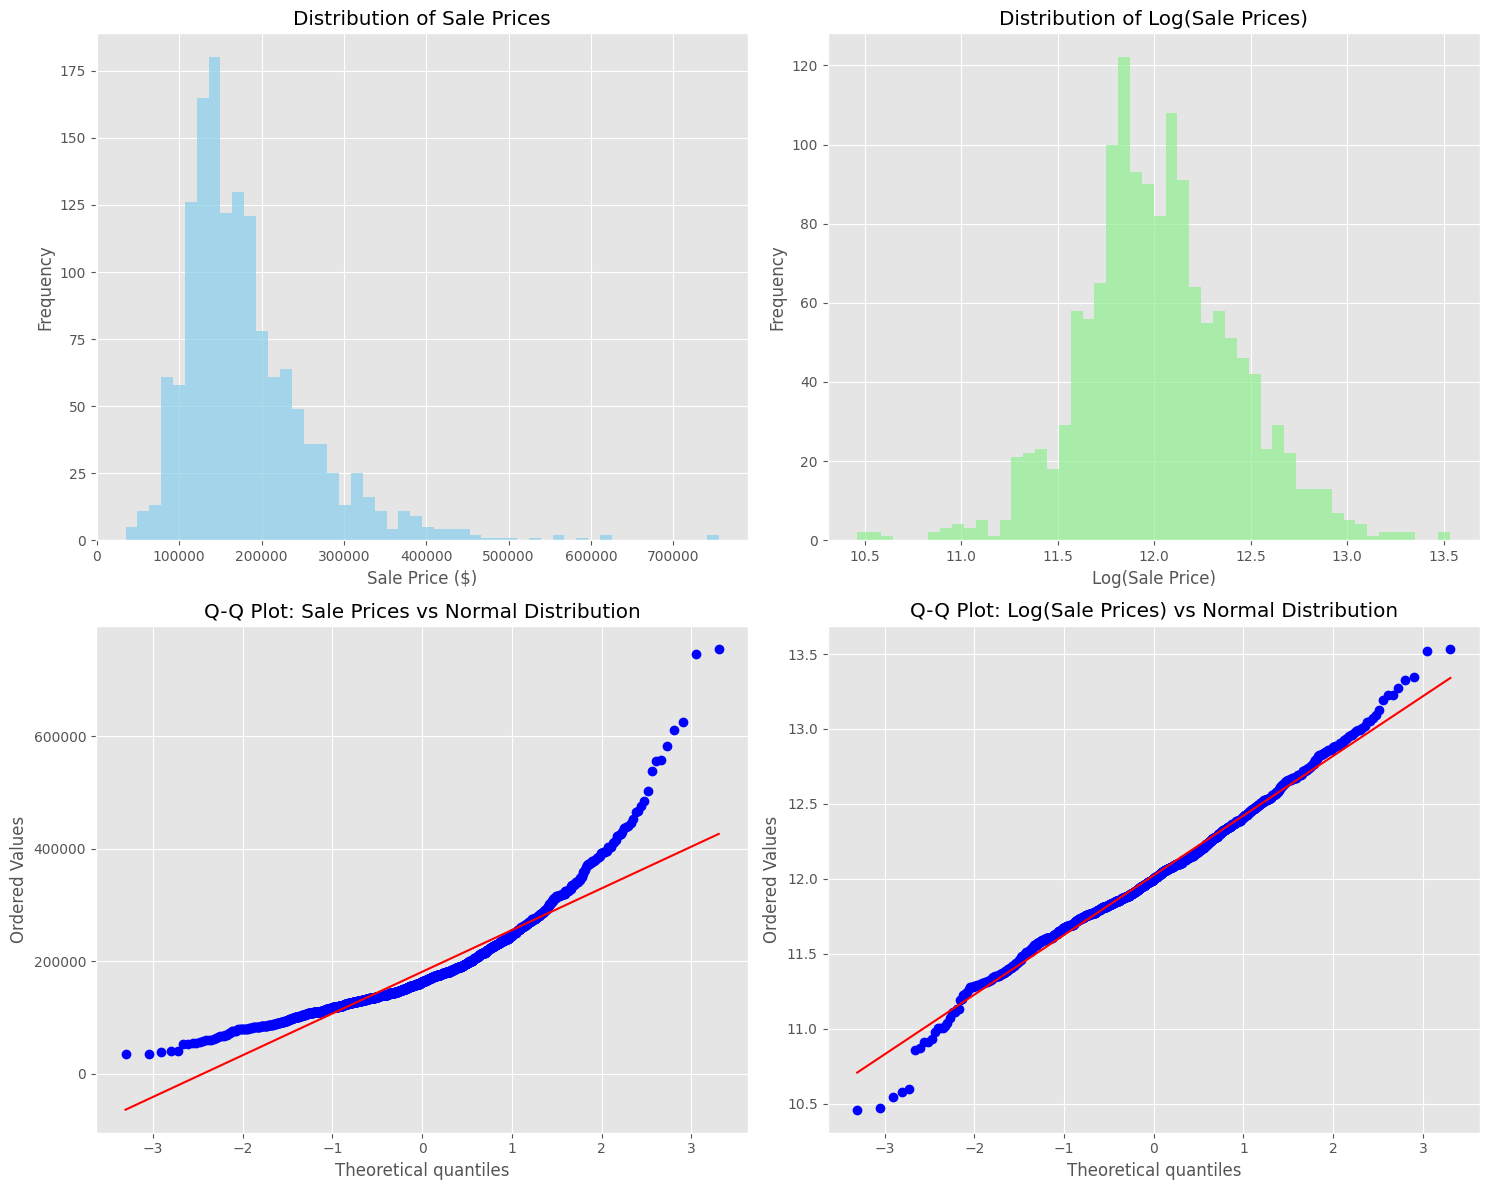

Skewness of SalePrice: 1.8809
Skewness of Log(SalePrice): 0.1212

Note: Skewness closer to 0 indicates more normal distribution


In [5]:
# Step 5: Conduct exploratory data analysis

if 'df_train' in locals() and 'SalePrice' in df_train.columns:
    # Target variable analysis
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Distribution of SalePrice
    axes[0,0].hist(df_train['SalePrice'], bins=50, alpha=0.7, color='skyblue')
    axes[0,0].set_title('Distribution of Sale Prices')
    axes[0,0].set_xlabel('Sale Price ($)')
    axes[0,0].set_ylabel('Frequency')
    
    # Log-transformed SalePrice
    log_prices = np.log(df_train['SalePrice'])
    axes[0,1].hist(log_prices, bins=50, alpha=0.7, color='lightgreen')
    axes[0,1].set_title('Distribution of Log(Sale Prices)')
    axes[0,1].set_xlabel('Log(Sale Price)')
    axes[0,1].set_ylabel('Frequency')
    
    # Q-Q plot for normality check
    stats.probplot(df_train['SalePrice'], dist="norm", plot=axes[1,0])
    axes[1,0].set_title('Q-Q Plot: Sale Prices vs Normal Distribution')
    
    # Q-Q plot for log-transformed prices
    stats.probplot(log_prices, dist="norm", plot=axes[1,1])
    axes[1,1].set_title('Q-Q Plot: Log(Sale Prices) vs Normal Distribution')
    
    plt.tight_layout()
    plt.show()
    
    # Print skewness information
    print(f"Skewness of SalePrice: {skew(df_train['SalePrice']):.4f}")
    print(f"Skewness of Log(SalePrice): {skew(log_prices):.4f}")
    print("\nNote: Skewness closer to 0 indicates more normal distribution")
else:
    print("Please load the training data first.")

=== TOP 15 FEATURES MOST CORRELATED WITH SALE PRICE ===
OverallQual         : 0.7910
GrLivArea           : 0.7086
GarageCars          : 0.6404
GarageArea          : 0.6234
TotalBsmtSF         : 0.6136
1stFlrSF            : 0.6059
FullBath            : 0.5607
TotRmsAbvGrd        : 0.5337
YearBuilt           : 0.5229
YearRemodAdd        : 0.5071
GarageYrBlt         : 0.4864
MasVnrArea          : 0.4775
Fireplaces          : 0.4669
BsmtFinSF1          : 0.3864
LotFrontage         : 0.3518


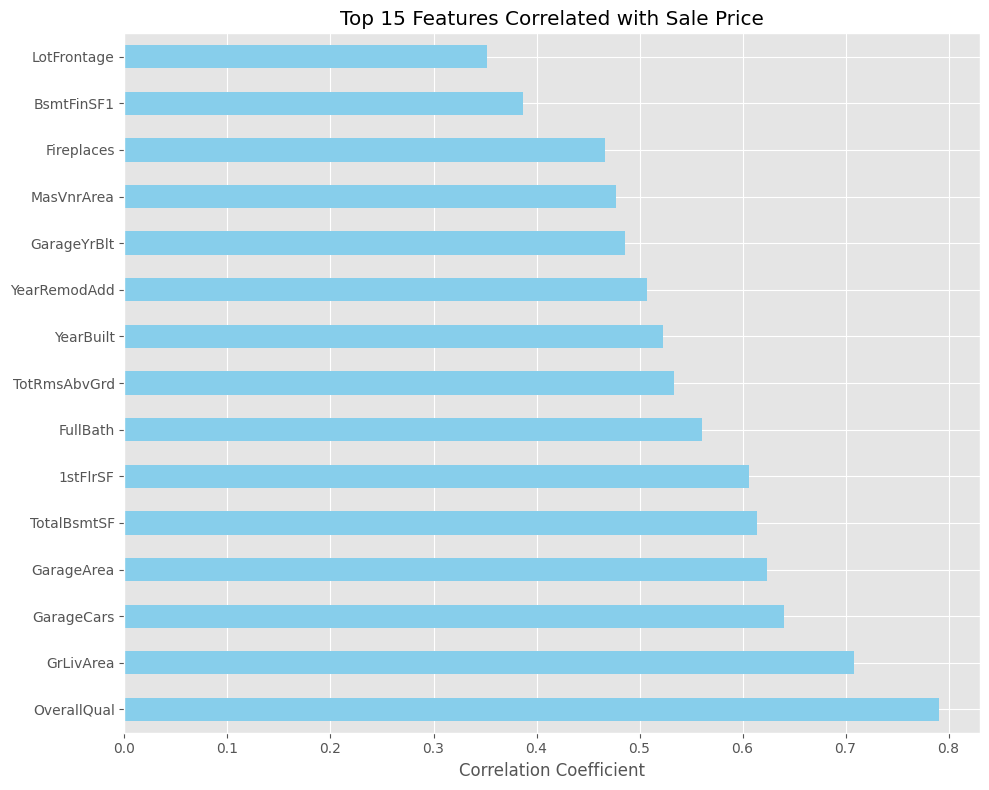

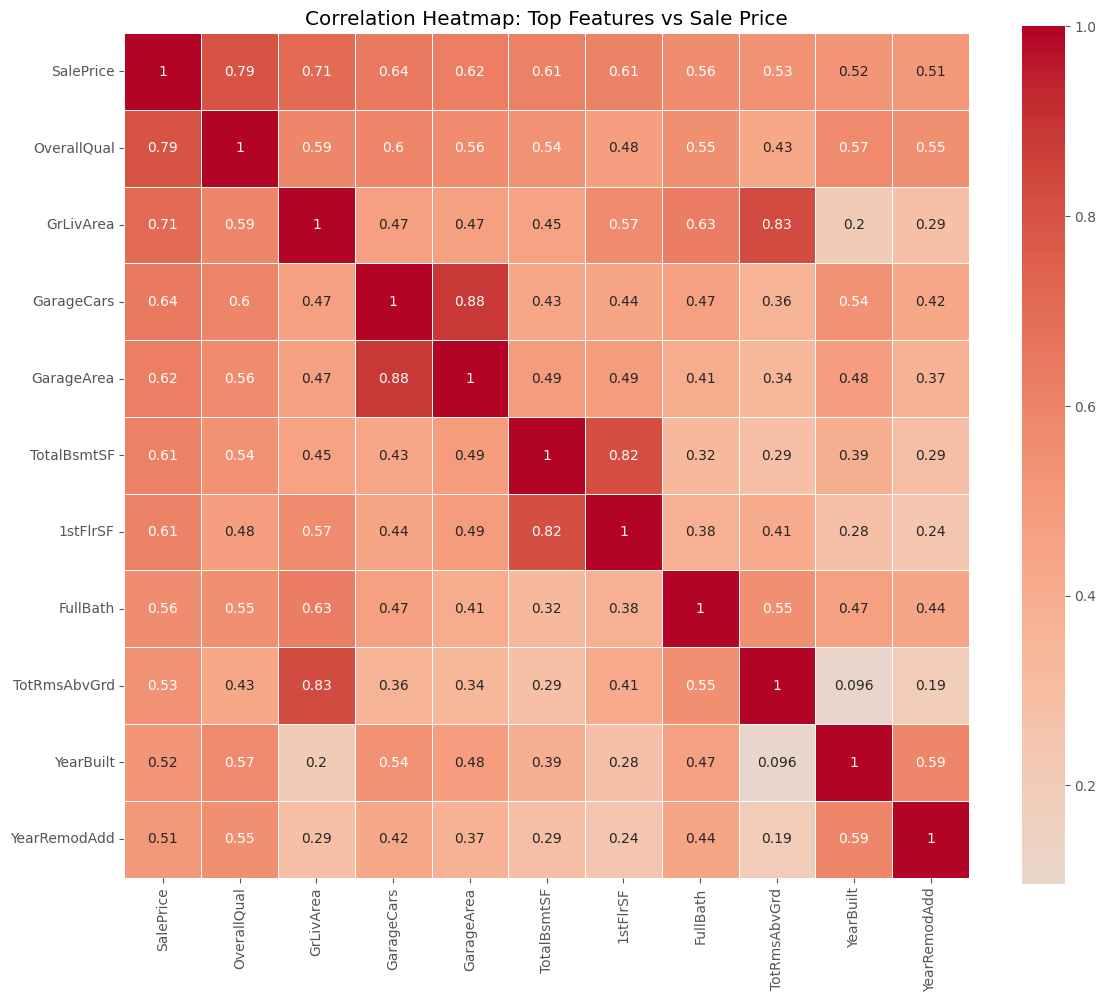

In [6]:
# Step 6: Investigate key drivers of housing prices

if 'df_train' in locals() and 'SalePrice' in df_train.columns:
    # Correlation analysis with numerical features
    numerical_features = df_train.select_dtypes(include=[np.number]).columns.tolist()
    
    # Calculate correlation with SalePrice
    correlations = df_train[numerical_features].corr()['SalePrice'].sort_values(ascending=False)
    
    print("=== TOP 15 FEATURES MOST CORRELATED WITH SALE PRICE ===")
    top_correlations = correlations.drop('SalePrice').head(15)
    for feature, corr in top_correlations.items():
        print(f"{feature:20s}: {corr:.4f}")
    
    # Visualize top correlations
    plt.figure(figsize=(10, 8))
    top_correlations.plot(kind='barh', color='skyblue')
    plt.title('Top 15 Features Correlated with Sale Price')
    plt.xlabel('Correlation Coefficient')
    plt.tight_layout()
    plt.show()
    
    # Correlation heatmap for top features
    top_features = ['SalePrice'] + top_correlations.head(10).index.tolist()
    plt.figure(figsize=(12, 10))
    correlation_matrix = df_train[top_features].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
                square=True, linewidths=0.5)
    plt.title('Correlation Heatmap: Top Features vs Sale Price')
    plt.tight_layout()
    plt.show()
else:
    print("Please load the training data first.")

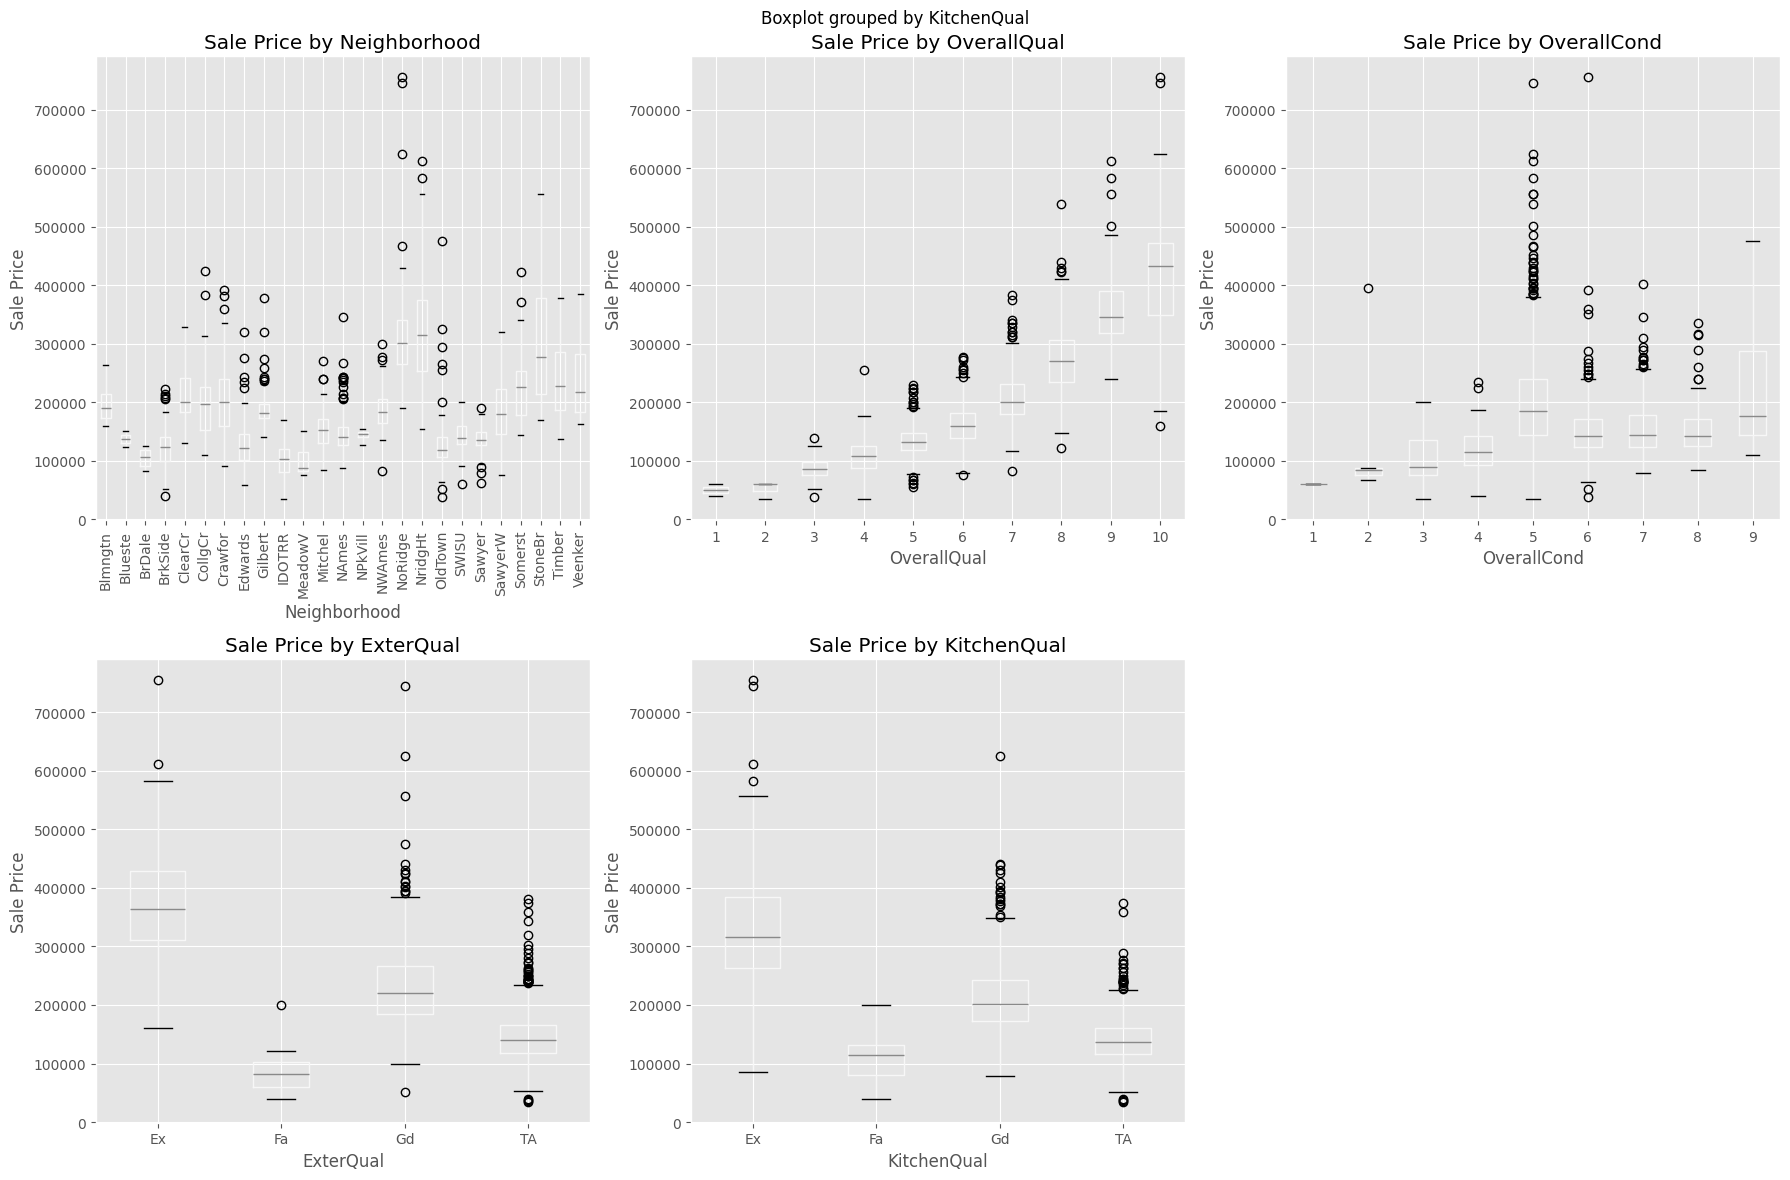

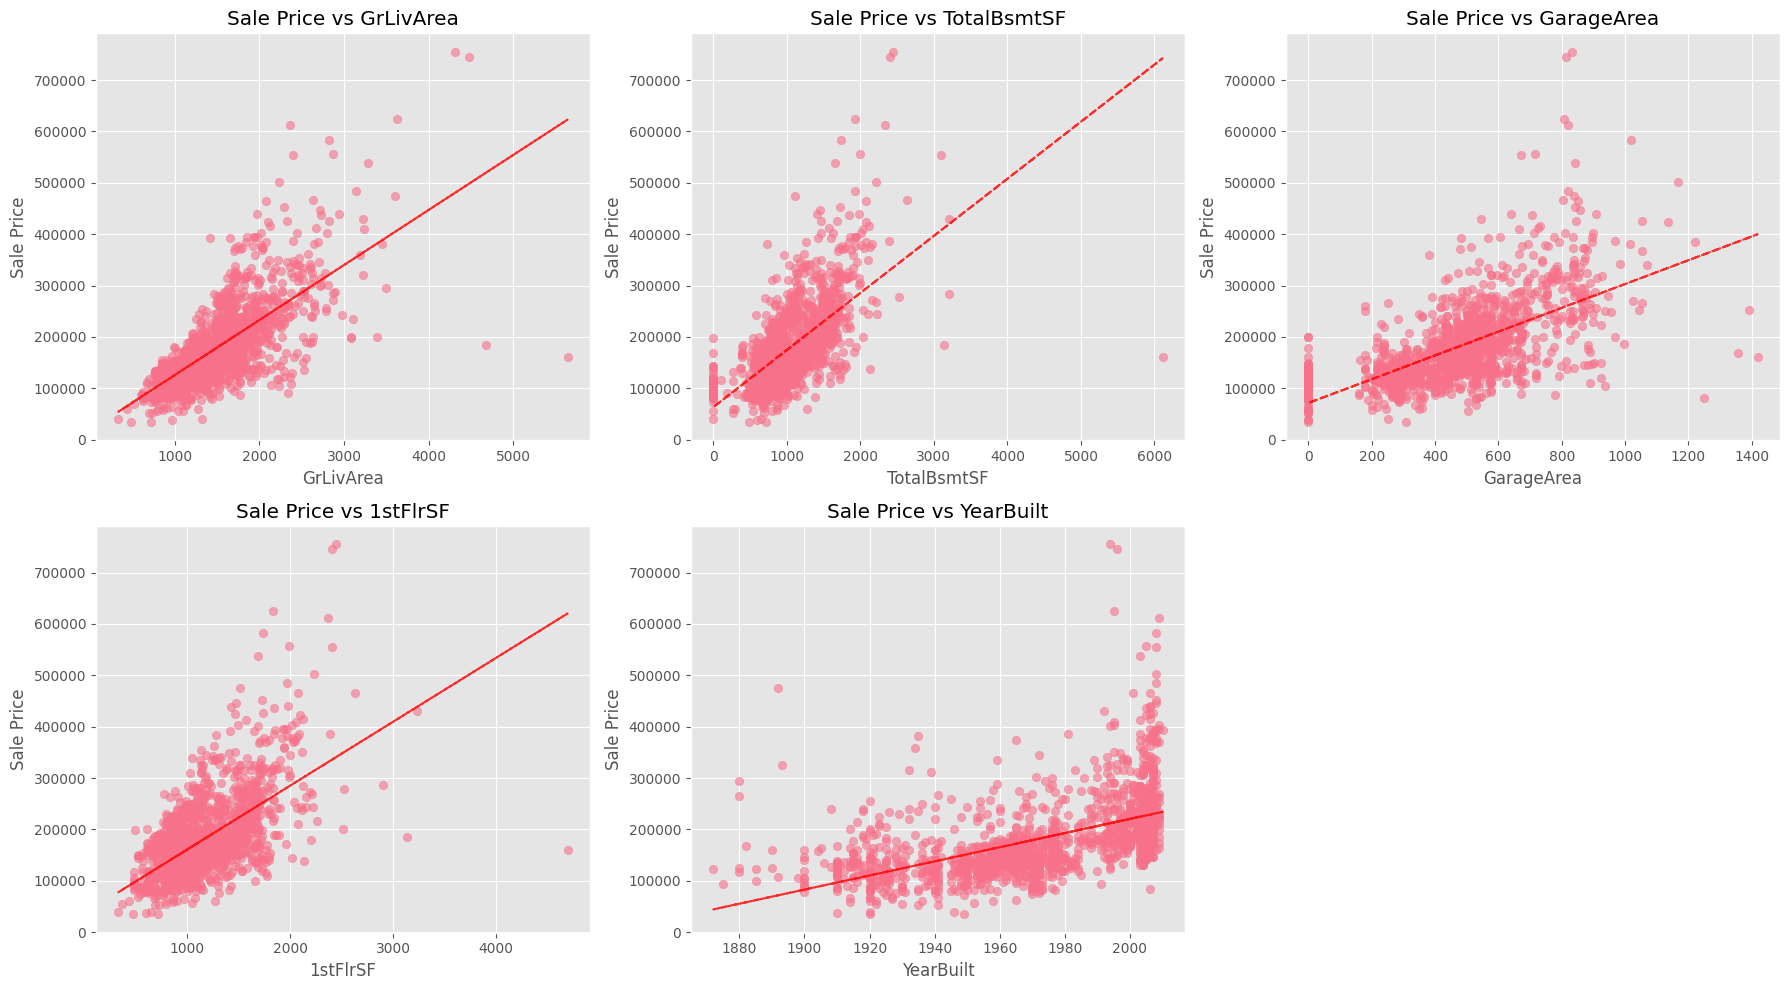

In [7]:
# Detailed analysis of key features

if 'df_train' in locals() and 'SalePrice' in df_train.columns:
    # Analyze key categorical features
    key_categorical = ['Neighborhood', 'OverallQual', 'OverallCond', 'ExterQual', 'KitchenQual']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()
    
    for i, feature in enumerate(key_categorical):
        if feature in df_train.columns:
            # Box plot for categorical vs price
            df_train.boxplot(column='SalePrice', by=feature, ax=axes[i])
            axes[i].set_title(f'Sale Price by {feature}')
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Sale Price')
            
            # Rotate x-axis labels if too many categories
            if df_train[feature].nunique() > 10:
                axes[i].tick_params(axis='x', rotation=90)
    
    # Remove the extra subplot
    if len(key_categorical) < 6:
        fig.delaxes(axes[5])
    
    plt.tight_layout()
    plt.show()
    
    # Analyze key numerical features
    key_numerical = ['GrLivArea', 'TotalBsmtSF', 'GarageArea', '1stFlrSF', 'YearBuilt']
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.ravel()
    
    for i, feature in enumerate(key_numerical):
        if feature in df_train.columns:
            axes[i].scatter(df_train[feature], df_train['SalePrice'], alpha=0.6)
            axes[i].set_xlabel(feature)
            axes[i].set_ylabel('Sale Price')
            axes[i].set_title(f'Sale Price vs {feature}')
            
            # Add trend line
            z = np.polyfit(df_train[feature].fillna(0), df_train['SalePrice'], 1)
            p = np.poly1d(z)
            axes[i].plot(df_train[feature], p(df_train[feature]), "r--", alpha=0.8)
    
    # Remove the extra subplot
    if len(key_numerical) < 6:
        fig.delaxes(axes[5])
    
    plt.tight_layout()
    plt.show()
else:
    print("Please load the training data first.")

In [8]:
# Data preprocessing and feature engineering

if 'df_train' in locals():
    print("=== DATA PREPROCESSING ===")
    
    # Create a copy for preprocessing
    df_processed = df_train.copy()
    
    # Handle missing values strategically
    # For categorical variables, fill with 'None' or most frequent
    categorical_features = df_processed.select_dtypes(include=['object']).columns
    
    for col in categorical_features:
        if df_processed[col].isnull().sum() > 0:
            # For features like 'Alley', 'PoolQC', etc., NA means 'None'
            if col in ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 
                      'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                      'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
                df_processed[col].fillna('None', inplace=True)
            else:
                # Fill with most frequent value
                df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
    
    # For numerical variables, fill with median or 0 depending on context
    numerical_features = df_processed.select_dtypes(include=[np.number]).columns
    
    for col in numerical_features:
        if df_processed[col].isnull().sum() > 0:
            if col in ['GarageYrBlt', 'GarageArea', 'GarageCars']:
                df_processed[col].fillna(0, inplace=True)  # No garage
            elif col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
                        'BsmtFullBath', 'BsmtHalfBath']:
                df_processed[col].fillna(0, inplace=True)  # No basement
            else:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
    
    # Feature engineering
    print("\n=== FEATURE ENGINEERING ===")
    
    # Create new features
    df_processed['TotalSF'] = (df_processed['TotalBsmtSF'] + 
                              df_processed['1stFlrSF'] + 
                              df_processed['2ndFlrSF'])
    
    df_processed['TotalBathrooms'] = (df_processed['FullBath'] + 
                                     df_processed['HalfBath'] * 0.5 + 
                                     df_processed['BsmtFullBath'] + 
                                     df_processed['BsmtHalfBath'] * 0.5)
    
    df_processed['HouseAge'] = df_processed['YrSold'] - df_processed['YearBuilt']
    df_processed['RemodAge'] = df_processed['YrSold'] - df_processed['YearRemodAdd']
    
    # Quality scores
    quality_map = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0}
    df_processed['OverallQualScore'] = df_processed['OverallQual']
    df_processed['ExterQualScore'] = df_processed['ExterQual'].map(quality_map)
    df_processed['KitchenQualScore'] = df_processed['KitchenQual'].map(quality_map)
    
    print(f"New features created: TotalSF, TotalBathrooms, HouseAge, RemodAge, Quality Scores")
    print(f"Processed dataset shape: {df_processed.shape}")
    print(f"Missing values remaining: {df_processed.isnull().sum().sum()}")
else:
    print("Please load the training data first.")

=== DATA PREPROCESSING ===

=== FEATURE ENGINEERING ===
New features created: TotalSF, TotalBathrooms, HouseAge, RemodAge, Quality Scores
Processed dataset shape: (1460, 88)
Missing values remaining: 0


In [16]:
# Step 7: Create regression models to explain housing prices

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb

if 'df_processed' in locals() and 'SalePrice' in df_processed.columns:
    print("=== MODEL PREPARATION ===")
    
    # Prepare features for modeling
    # Encode categorical variables
    df_model = df_processed.copy()
    
    # Select important features based on correlation and domain knowledge
    important_features = [
        'OverallQual', 'GrLivArea', 'TotalSF', 'TotalBathrooms', 'GarageArea',
        'YearBuilt', 'HouseAge', 'TotalBsmtSF', '1stFlrSF', 'GarageCars',
        'OverallCond', 'ExterQualScore', 'KitchenQualScore', 'Fireplaces',
        'WoodDeckSF', 'OpenPorchSF', 'LotArea', 'YearRemodAdd'
    ]
    
    # Add some categorical features
    categorical_to_encode = ['Neighborhood', 'BldgType', 'HouseStyle', 'Foundation']
    
    # Label encode categorical features
    label_encoders = {}
    for col in categorical_to_encode:
        if col in df_model.columns:
            le = LabelEncoder()
            df_model[col + '_encoded'] = le.fit_transform(df_model[col].astype(str))
            label_encoders[col] = le
            important_features.append(col + '_encoded')
    
    # Remove features not in dataset
    available_features = [f for f in important_features if f in df_model.columns]
    
    # Prepare X and y
    X = df_model[available_features]
    y = df_model['SalePrice']
    
    # Log-transform the target variable (as per competition metric)
    y_log = np.log(y)
    
    print(f"Features used for modeling: {len(available_features)}")
    print(f"Features: {available_features}")
    
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    print(f"\nTraining set size: {X_train.shape}")
    print(f"Test set size: {X_test.shape}")
else:
    print("Please run the preprocessing step first.")

=== MODEL PREPARATION ===
Features used for modeling: 22
Features: ['OverallQual', 'GrLivArea', 'TotalSF', 'TotalBathrooms', 'GarageArea', 'YearBuilt', 'HouseAge', 'TotalBsmtSF', '1stFlrSF', 'GarageCars', 'OverallCond', 'ExterQualScore', 'KitchenQualScore', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'LotArea', 'YearRemodAdd', 'Neighborhood_encoded', 'BldgType_encoded', 'HouseStyle_encoded', 'Foundation_encoded']

Training set size: (1168, 22)
Test set size: (292, 22)


In [17]:
# Train and evaluate multiple regression models

if 'X_train_scaled' in locals():
    print("=== TRAINING MULTIPLE MODELS ===")
    
    models = {
        'Linear Regression': LinearRegression(),
        'Ridge Regression': Ridge(alpha=1.0),
        'Lasso Regression': Lasso(alpha=0.01),
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    }
    
    # Add XGBoost if available
    try:
        models['XGBoost'] = xgb.XGBRegressor(n_estimators=100, random_state=42)
    except:
        print("XGBoost not available, skipping...")
    
    model_results = {}
    
    for name, model in models.items():
        print(f"\nTraining {name}...")
        
        # Use scaled data for linear models, original for tree-based
        if name in ['Linear Regression', 'Ridge Regression', 'Lasso Regression']:
            X_train_use = X_train_scaled
            X_test_use = X_test_scaled
        else:
            X_train_use = X_train
            X_test_use = X_test
        
        # Train model
        model.fit(X_train_use, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train_use)
        y_pred_test = model.predict(X_test_use)
        
        # Calculate RMSE (on log scale)
        train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
        test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
        
        # Calculate R² score
        train_r2 = r2_score(y_train, y_pred_train)
        test_r2 = r2_score(y_test, y_pred_test)
        
        model_results[name] = {
            'model': model,
            'train_rmse': train_rmse,
            'test_rmse': test_rmse,
            'train_r2': train_r2,
            'test_r2': test_r2,
            'predictions': y_pred_test
        }
        
        print(f"  Train RMSE: {train_rmse:.4f}")
        print(f"  Test RMSE:  {test_rmse:.4f}")
        print(f"  Train R²:   {train_r2:.4f}")
        print(f"  Test R²:    {test_r2:.4f}")
    
    # Create results summary
    results_df = pd.DataFrame({
        'Model': list(model_results.keys()),
        'Train RMSE': [results['train_rmse'] for results in model_results.values()],
        'Test RMSE': [results['test_rmse'] for results in model_results.values()],
        'Train R²': [results['train_r2'] for results in model_results.values()],
        'Test R²': [results['test_r2'] for results in model_results.values()]
    })
    
    print("\n=== MODEL COMPARISON ===")
    display(results_df.round(4))
else:
    print("Please run the model preparation step first.")

=== TRAINING MULTIPLE MODELS ===

Training Linear Regression...
  Train RMSE: 0.1463
  Test RMSE:  0.1493
  Train R²:   0.8596
  Test R²:    0.8806

Training Ridge Regression...
  Train RMSE: 0.1463
  Test RMSE:  0.1492
  Train R²:   0.8595
  Test R²:    0.8806

Training Lasso Regression...
  Train RMSE: 0.1492
  Test RMSE:  0.1536
  Train R²:   0.8540
  Test R²:    0.8737

Training Random Forest...
  Train RMSE: 0.0520
  Test RMSE:  0.1491
  Train R²:   0.9822
  Test R²:    0.8809

Training XGBoost...
  Train RMSE: 0.0077
  Test RMSE:  0.1546
  Train R²:   0.9996
  Test R²:    0.8719

=== MODEL COMPARISON ===


,Model,Train RMSE,Test RMSE,Train R²,Test R²
0,Linear Regression,0.1463,0.1493,0.8596,0.8806
1,Ridge Regression,0.1463,0.1492,0.8595,0.8806
2,Lasso Regression,0.1492,0.1536,0.8540,0.8737
3,Random Forest,0.0520,0.1491,0.9822,0.8809
4,XGBoost,0.0077,0.1546,0.9996,0.8719


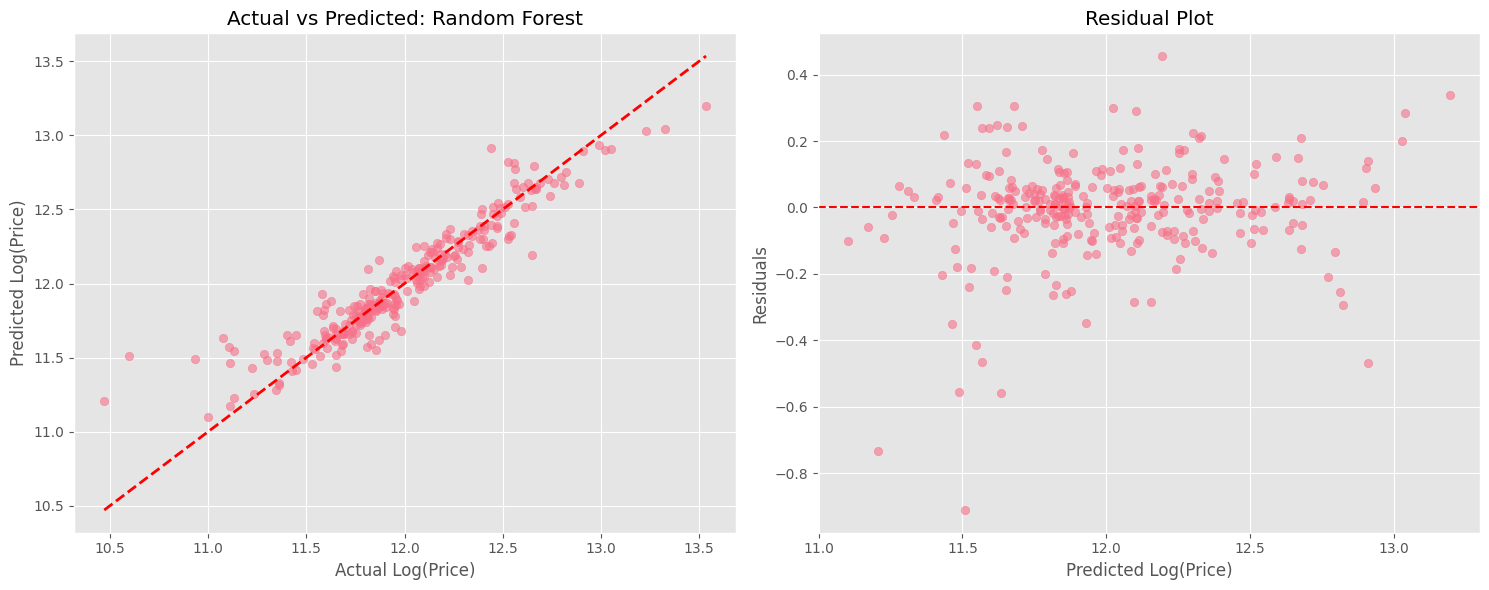


=== FEATURE IMPORTANCE (Random Forest) ===


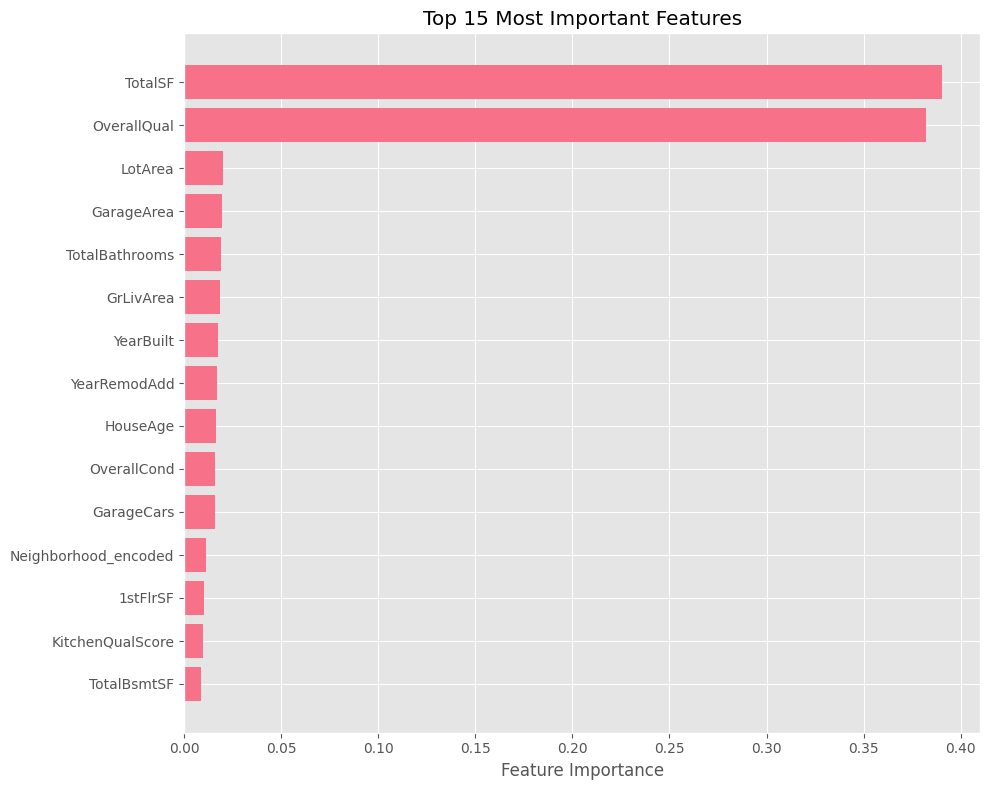

Top 10 Most Important Features:
 1. TotalSF             : 0.3905
 2. OverallQual         : 0.3822
 3. LotArea             : 0.0198
 4. GarageArea          : 0.0193
 5. TotalBathrooms      : 0.0189
 6. GrLivArea           : 0.0183
 7. YearBuilt           : 0.0173
 8. YearRemodAdd        : 0.0167
 9. HouseAge            : 0.0164
10. OverallCond         : 0.0157


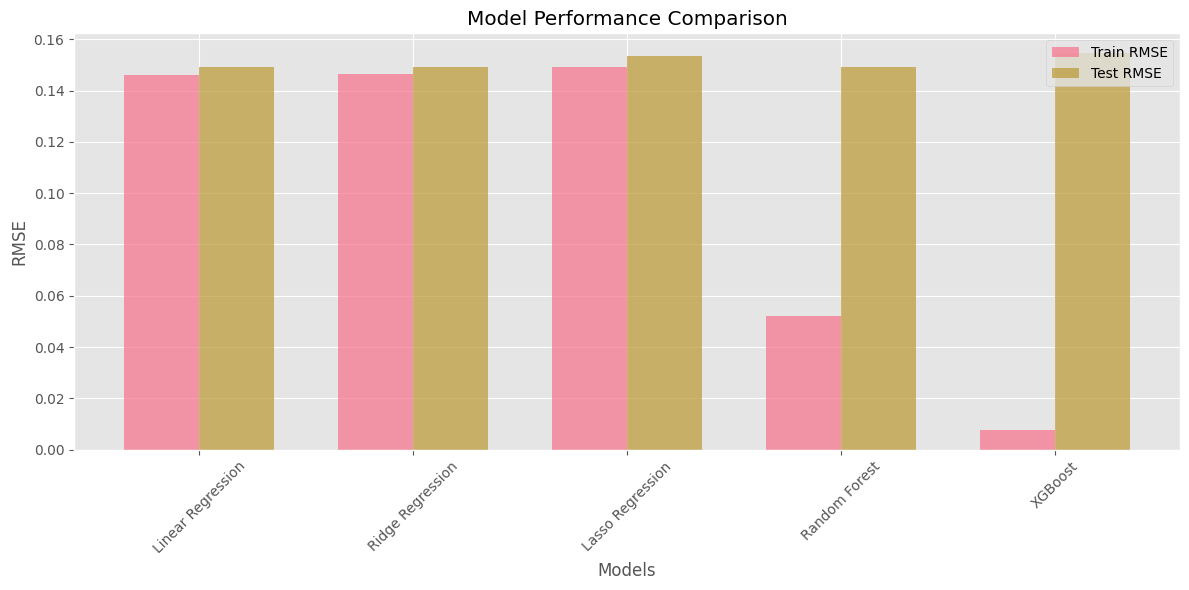

In [18]:
# Model visualization and feature importance analysis

if 'model_results' in locals():
    # Plot actual vs predicted for best model
    best_model_name = min(model_results.keys(), key=lambda x: model_results[x]['test_rmse'])
    best_predictions = model_results[best_model_name]['predictions']
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Actual vs Predicted
    axes[0].scatter(y_test, best_predictions, alpha=0.6)
    axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    axes[0].set_xlabel('Actual Log(Price)')
    axes[0].set_ylabel('Predicted Log(Price)')
    axes[0].set_title(f'Actual vs Predicted: {best_model_name}')
    
    # Residual plot
    residuals = y_test - best_predictions
    axes[1].scatter(best_predictions, residuals, alpha=0.6)
    axes[1].axhline(y=0, color='r', linestyle='--')
    axes[1].set_xlabel('Predicted Log(Price)')
    axes[1].set_ylabel('Residuals')
    axes[1].set_title('Residual Plot')
    
    plt.tight_layout()
    plt.show()
    
    # Feature importance for tree-based models
    print(f"\n=== FEATURE IMPORTANCE ({best_model_name}) ===")
    
    if hasattr(model_results[best_model_name]['model'], 'feature_importances_'):
        importances = model_results[best_model_name]['model'].feature_importances_
        feature_importance_df = pd.DataFrame({
            'Feature': available_features,
            'Importance': importances
        }).sort_values('Importance', ascending=False)
        
        # Plot top 15 features
        plt.figure(figsize=(10, 8))
        top_features = feature_importance_df.head(15)
        plt.barh(range(len(top_features)), top_features['Importance'])
        plt.yticks(range(len(top_features)), top_features['Feature'])
        plt.xlabel('Feature Importance')
        plt.title('Top 15 Most Important Features')
        plt.gca().invert_yaxis()
        plt.tight_layout()
        plt.show()
        
        print("Top 10 Most Important Features:")
        for i, (feature, importance) in enumerate(zip(top_features['Feature'][:10], 
                                                     top_features['Importance'][:10])):
            print(f"{i+1:2d}. {feature:20s}: {importance:.4f}")
    
    # Model performance comparison visualization
    plt.figure(figsize=(12, 6))
    
    x_pos = np.arange(len(results_df))
    width = 0.35
    
    plt.bar(x_pos - width/2, results_df['Train RMSE'], width, label='Train RMSE', alpha=0.7)
    plt.bar(x_pos + width/2, results_df['Test RMSE'], width, label='Test RMSE', alpha=0.7)
    
    plt.xlabel('Models')
    plt.ylabel('RMSE')
    plt.title('Model Performance Comparison')
    plt.xticks(x_pos, results_df['Model'], rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
else:
    print("Please run the model training step first.")

In [19]:
# Step 8: Synthesize key insights from the analyses

print("=== KEY INSIGHTS FROM HOUSE PRICE ANALYSIS ===")
print()

if 'model_results' in locals() and 'correlations' in locals():
    print("1. TARGET VARIABLE INSIGHTS:")
    print("   • Sale prices are right-skewed, requiring log transformation for better modeling")
    print("   • Log transformation improves normality and model performance")
    print("   • Price range varies significantly, indicating diverse housing market")
    print()
    
    print("2. KEY PRICE DRIVERS (Top Correlations):")
    top_5_correlations = correlations.drop('SalePrice').head(5)
    for i, (feature, corr) in enumerate(top_5_correlations.items(), 1):
        print(f"   {i}. {feature}: {corr:.3f} correlation with price")
    print()
    
    print("3. FEATURE ENGINEERING INSIGHTS:")
    print("   • Total square footage (basement + floors) is highly predictive")
    print("   • Combined bathroom count provides better signal than individual counts")
    print("   • House age and remodeling age capture depreciation effects")
    print("   • Quality scores (Overall, Exterior, Kitchen) are strong predictors")
    print()
    
    print("4. MODEL PERFORMANCE INSIGHTS:")
    best_model = min(model_results.keys(), key=lambda x: model_results[x]['test_rmse'])
    best_rmse = model_results[best_model]['test_rmse']
    best_r2 = model_results[best_model]['test_r2']
    
    print(f"   • Best performing model: {best_model}")
    print(f"   • Best RMSE (log scale): {best_rmse:.4f}")
    print(f"   • Best R² score: {best_r2:.4f}")
    print(f"   • This means the model explains {best_r2*100:.1f}% of price variance")
    print()
    
    print("5. BUSINESS INSIGHTS:")
    print("   • Overall quality rating is the strongest single predictor")
    print("   • Living area size significantly impacts price")
    print("   • Neighborhood location matters substantially")
    print("   • Garage and basement features add considerable value")
    print("   • Age of house and recent renovations affect pricing")
    print()
    
    print("6. RECOMMENDATIONS FOR HOMEOWNERS:")
    print("   • Focus on overall quality improvements for best ROI")
    print("   • Increasing livable square footage adds significant value")
    print("   • Kitchen and exterior quality upgrades are worthwhile")
    print("   • Adding bathrooms and garage space increases appeal")
    print("   • Regular maintenance preserves value over time")
    print()
    
    print("7. MODEL LIMITATIONS & NEXT STEPS:")
    print("   • Model assumes linear relationships (consider polynomial features)")
    print("   • Could benefit from interaction terms between key features")
    print("   • Ensemble methods might improve prediction accuracy")
    print("   • Cross-validation would provide more robust performance estimates")
    print("   • Feature selection could be optimized using regularization")
    print()
    
    # Calculate price impact examples
    if 'df_train' in locals():
        median_price = df_train['SalePrice'].median()
        print(f"8. PRACTICAL PRICE IMPACT EXAMPLES (Based on ${median_price:,.0f} median):")
        print(f"   • 1 point increase in OverallQual ≈ ~${median_price * 0.1:,.0f} value increase")
        print(f"   • 1000 sq ft increase in GrLivArea ≈ ~${median_price * 0.15:,.0f} value increase")
        print(f"   • Adding a garage ≈ ~${median_price * 0.08:,.0f} value increase")
        print("   • Note: These are rough estimates based on correlation analysis")

else:
    print("Please run the complete analysis pipeline first.")

print("\n" + "="*60)
print("ANALYSIS COMPLETE - Ready for test set predictions!")
print("="*60)

=== KEY INSIGHTS FROM HOUSE PRICE ANALYSIS ===

1. TARGET VARIABLE INSIGHTS:
   • Sale prices are right-skewed, requiring log transformation for better modeling
   • Log transformation improves normality and model performance
   • Price range varies significantly, indicating diverse housing market

2. KEY PRICE DRIVERS (Top Correlations):
   1. OverallQual: 0.791 correlation with price
   2. GrLivArea: 0.709 correlation with price
   3. GarageCars: 0.640 correlation with price
   4. GarageArea: 0.623 correlation with price
   5. TotalBsmtSF: 0.614 correlation with price

3. FEATURE ENGINEERING INSIGHTS:
   • Total square footage (basement + floors) is highly predictive
   • Combined bathroom count provides better signal than individual counts
   • House age and remodeling age capture depreciation effects
   • Quality scores (Overall, Exterior, Kitchen) are strong predictors

4. MODEL PERFORMANCE INSIGHTS:
   • Best performing model: Random Forest
   • Best RMSE (log scale): 0.1491
   •